In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical



In [12]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo,encoding='bytes')
    return dict


In [13]:
batch_files = [
    './cifar-10-batches-py/data_batch_1',
    './cifar-10-batches-py/data_batch_2',
    './cifar-10-batches-py/data_batch_3',
    './cifar-10-batches-py/data_batch_4',
    './cifar-10-batches-py/data_batch_5'
]

In [14]:
x_train = []
y_train = []


In [15]:
for batch_file in batch_files:
    batch = unpickle(batch_file)

    x_batch = batch[b'data']
    y_batch = batch[b'labels']

    x_batch = x_batch.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)

    x_train.append(x_batch)
    y_train.extend(y_batch)  # ✅ Use extend instead of append


x_train = np.vstack(x_train)
y_train = np.array(y_train).flatten()  # ✅ Flatten the labels


x_train = x_train / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)

print(f"Training Images Shape: {x_train.shape}") 
print(f"Training Labels Shape: {y_train.shape}") 




Training Images Shape: (50000, 32, 32, 3)
Training Labels Shape: (50000, 10)


In [16]:
#test data

test_batch = unpickle('./cifar-10-batches-py/test_batch')



x_test = test_batch[b'data']
y_test = test_batch[b'labels']

x_test = x_test.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)


x_test = x_test / 255.0


y_test = tf.keras.utils.to_categorical(y_test, 10)


print(f"Test Images Shape: {x_test.shape}")   # (10000, 32, 32, 3)
print(f"Test Labels Shape: {y_test.shape}") 

Test Images Shape: (10000, 32, 32, 3)
Test Labels Shape: (10000, 10)


In [17]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

# Fit the generator to the training data
datagen.fit(x_train)


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam


In [41]:
model = Sequential()

In [42]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))  # Add input shape here
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

c:\Users\naman\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

In [44]:
model.add(Flatten())

In [45]:
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

In [46]:
model.add(Dense(10, activation='softmax'))

In [47]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 13, 13, 128)    │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 13, 13, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,221,002 (4.66 MB)

 Trainable params: 1,220,682 (4.66 MB)

 Non-trainable params: 320 (1.25 KB)

In [48]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [50]:
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=30,
    batch_size=64
)

Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 0.3124 - loss: 2.1039 - val_accuracy: 0.5064 - val_loss: 1.3506
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.4822 - loss: 1.4336 - val_accuracy: 0.5807 - val_loss: 1.2082
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.5408 - loss: 1.2862 - val_accuracy: 0.6090 - val_loss: 1.1334
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.5850 - loss: 1.1790 - val_accuracy: 0.5760 - val_loss: 1.1819
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.6162 - loss: 1.1086 - val_accuracy: 0.6742 - val_loss: 0.9310
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.6304 - loss: 1.0538 - val_accuracy: 0.6398 - val_loss: 1.0135
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.6509 - loss: 1.0119 - val_accuracy: 0.6951 - val_loss: 0.8729
Epoch 8/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.6597 - loss: 0.9698 - 

In [51]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7651 - loss: 0.7387
Test Accuracy: 76.37%


Text(0.5, 1.0, 'Model Accuracy')

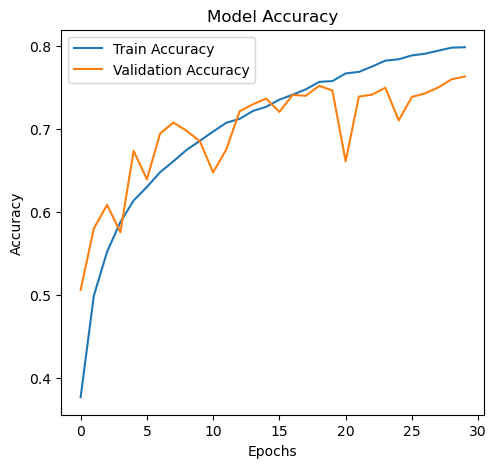

In [52]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')


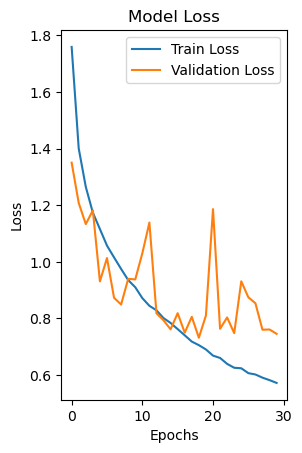

In [53]:

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()


In [56]:
model.save("model.h5")
print("Model saved successfully!")


Model saved successfully!


In [57]:
from tensorflow.keras.models import load_model

deployed_model = load_model("model.h5")
print("Model loaded successfully!")


Model loaded successfully!


In [58]:

# Test again with new images
loss, accuracy = deployed_model.evaluate(x_test, y_test, verbose=1)
print(f"Deployed Model Accuracy: {accuracy}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7651 - loss: 0.7387
Deployed Model Accuracy: 0.763700008392334
